In [ ]:
#pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 15 kB/s 
     |████████████████████████████████| 3.8 MB 24.2 MB/s 
     |████████████████████████████████| 462 kB 74.5 MB/s 
     |████████████████████████████████| 2.9 MB 19.3 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.

In [ ]:
import tensorflow as tf
print(tf.__version__) # Check tensorflow version.

2.4.0


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

data = open('/content/chw_HD_replaced.txt').read() # Read the training data I upload.

corpus = data.lower().split("\n") # Define corpus

tokenizer.fit_on_texts(corpus) # Updates internal vocabulary based on a list of texts, creates the vocabulary index based on word frequency.
total_words = len(tokenizer.word_index) + 1 # Length of total words appered in this data.

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'to': 3, 'a': 4, 'of': 5, 'he': 6, 'in': 7, 'humpty': 8, 'i': 9, 'dumpty': 10, 'was': 11, 'said': 12, 'you': 13, 'it': 14, 'his': 15, 'she': 16, 'that': 17, 'charlotte': 18, 'her': 19, 'on': 20, 'is': 21, 'for': 22, 'at': 23, 'with': 24, 'fern': 25, 'out': 26, 'pig': 27, 'up': 28, 'as': 29, 'had': 30, 'zuckerman': 31, 'all': 32, 'when': 33, 'into': 34, 'him': 35, 'be': 36, 'this': 37, 'web': 38, 'mr': 39, 'what': 40, 'then': 41, 'have': 42, 'but': 43, 'my': 44, 'down': 45, 'mrs': 46, 'they': 47, 'would': 48, 'from': 49, 'arable': 50, 'about': 51, "don't": 52, 'not': 53, 'so': 54, 'there': 55, 'one': 56, 'me': 57, 'asked': 58, 'good': 59, 'templeton': 60, "i'm": 61, 'are': 62, 'were': 63, 'see': 64, 'no': 65, 'avery': 66, 'lurvy': 67, 'will': 68, 'do': 69, 'your': 70, 'just': 71, 'can': 72, 'time': 73, 'if': 74, 'over': 75, 'go': 76, 'goose': 77, 'back': 78, 'barn': 79, 'very': 80, "it's": 81, 'now': 82, 'rat': 83, 'like': 84, 'sheep': 85, 'by': 86, 'think': 87, "du

In [ ]:
input_sequences = [] # create empty sequences
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] #for each line of the corpus, create list of tokens.
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence) # generate n-gram of token_list
 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) # pad sequences beginning with 0

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # create predictors and label, categorical

In [ ]:
#print(tokenizer.word_index['in'])
#print(tokenizer.word_index['the'])
#print(tokenizer.word_index['town'])
#print(tokenizer.word_index['of'])
#print(tokenizer.word_index['athy'])
#print(tokenizer.word_index['one'])
#print(tokenizer.word_index['jeremy'])
#print(tokenizer.word_index['lanigan'])

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) #set up of embedding layer
model.add(Bidirectional(LSTM(150))) 
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.0003)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=120, verbose=1)

print(model) #print model.summary()

Epoch 1/120
911/911 [==============================] - 106s 113ms/step - loss: 6.8362 - accuracy: 0.0557
Epoch 2/120
911/911 [==============================] - 101s 111ms/step - loss: 6.1712 - accuracy: 0.0725
Epoch 3/120
911/911 [==============================] - 101s 111ms/step - loss: 5.9513 - accuracy: 0.0832
Epoch 4/120
911/911 [==============================] - 101s 111ms/step - loss: 5.7555 - accuracy: 0.0964
Epoch 5/120
911/911 [==============================] - 101s 111ms/step - loss: 5.5596 - accuracy: 0.1141
Epoch 6/120
911/911 [==============================] - 101s 111ms/step - loss: 5.4149 - accuracy: 0.1237
Epoch 7/120
911/911 [==============================] - 104s 114ms/step - loss: 5.3055 - accuracy: 0.1313
Epoch 8/120
911/911 [==============================] - 102s 112ms/step - loss: 5.1505 - accuracy: 0.1403
Epoch 9/120
911/911 [==============================] - 103s 113ms/step - loss: 5.0271 - accuracy: 0.1456
Epoch 10/120
911/911 [==============================] -

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

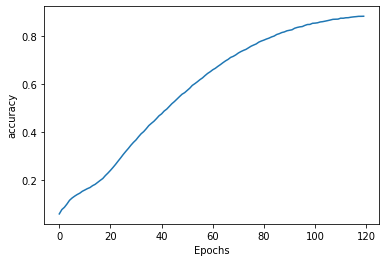

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "Humpty Dumpty sat on a wall,"
next_words = 700
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Humpty Dumpty sat on a wall, pile in the pig wouldn't saw the words on the words up this was a little place on this days the way to be the end of the big little rushed to the front of eggs a little head gasped water over the fence stood on the top of the load meekly in the bottom corner of the top of the load of the top of the main hearted aranea nellie aranea in the top of the load and the big oats hearted words the big big ladies thank eggs eggs in the morning ol' bitterly meekly in the hay everybody in the big eggs which which which which which which to speak little are going of me and the way and now right back around the word the way the arables the little of us am the zuckermans lengthened the zuckermans praise up the top of the load and the top of the load meekly in the top gasped of water the top of corner nellie was a big grey ordered hearted story nellie he did not in the fair eggs are going to me there and do as a rat in a web he did you know did you are as well in the darkn